# Technical Analysis - Advanced 

## This cut will build an ARIMA Model using Pyflux

# 1. Prepare the Data Set

First step is to visualize the data to understand what type of model to use later on.
Is there an overall trend in your data that I should be aware of? 
Does the data show any seasonal trends? If there isn’t a seasonal trend in the data, I can just use a regular ARIMA model instead. 

In [17]:
# set up the environment for the data exploration
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
# for a start, there is a need to change 'Date' from data type 'object' to TS object
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')

In [19]:
# followed by a ts parse of the same original CVS data
data2 = pd.read_csv('aud_fx_thb_jpy_usd.csv', na_values=[' '], parse_dates=[0], index_col=[0], date_parser=dateparse)
# drop the null values
data2= pd.DataFrame(data2).dropna()
print (data2.head())

            AUDTHB  AUDJPY  AUDUSD
Date                              
2006-01-02  30.080   86.47  0.7331
2006-01-03  30.160   85.96  0.7398
2006-01-04  30.195   86.72  0.7478
2006-01-05  30.050   86.63  0.7475
2006-01-06  29.990   86.28  0.7541


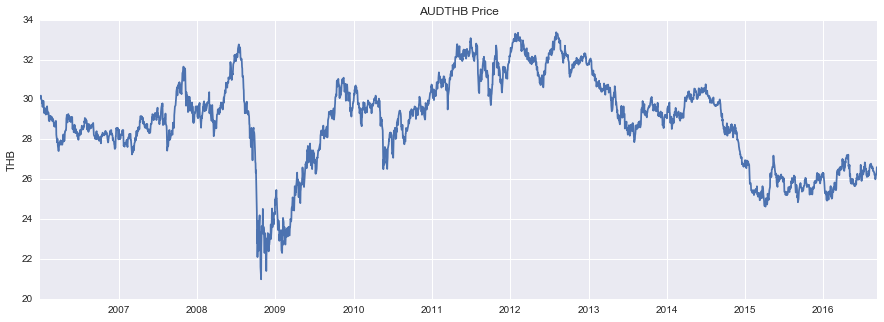

In [20]:
plt.figure(figsize=(15,5))
plt.plot(data2.index,data2.AUDTHB)
plt.ylabel('THB')
plt.title('AUDTHB Price');

# 2. Build ARIMA Model

In [28]:
model = pf.ARIMA(data=data2,ar=1,ma=1,integ=0,target='AUDTHB')

In [29]:
x = model.fit("MLE")
x.summary()

ARIMA(1,0,1)                                                                                              
======================================================= ==================================================
Dependent Variable: AUDTHB                              Method: MLE                                       
Start Date: 2006-01-03 00:00:00                         Log Likelihood: -4704.195                         
End Date: 2016-09-09 00:00:00                           AIC: 9416.3899                                    
Number of observations: 2789                            BIC: 9440.1237                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 28.8232    0.7049     40.8911  0.0      (27.4416 | 30.2047)      
AR(1)                                

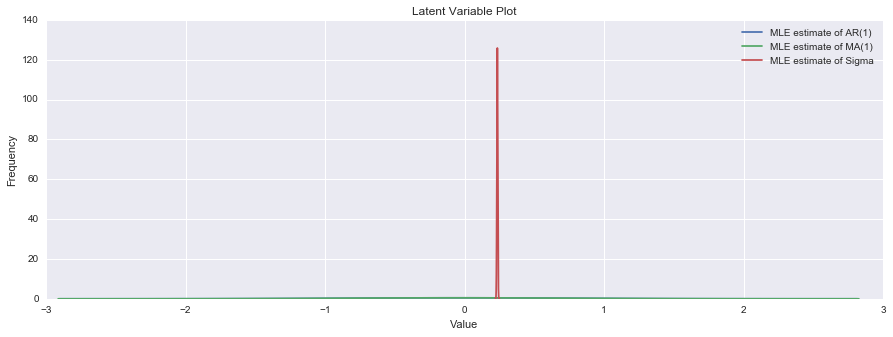

In [7]:
model.plot_z(indices=range(1,9))

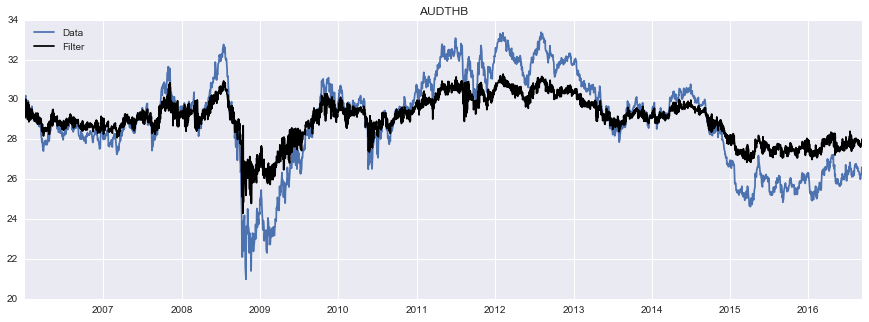

In [30]:
model.plot_fit(figsize=(15,5))

In [31]:
print (data2.tail())

             AUDTHB  AUDJPY  AUDUSD
Date                               
2016-09-05  26.3400   78.43  0.7582
2016-09-06  26.6050   78.44  0.7689
2016-09-07  26.5800   78.06  0.7673
2016-09-08  26.5800   78.34  0.7644
2016-09-09  26.2265   77.44  0.7541


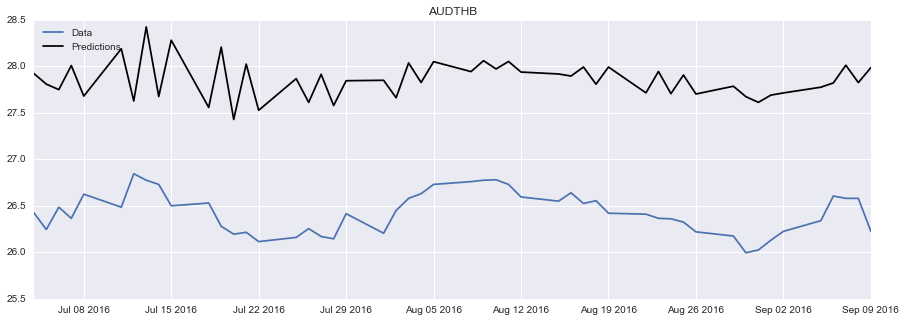

In [32]:
model.plot_predict_is(50,figsize=(15,5))

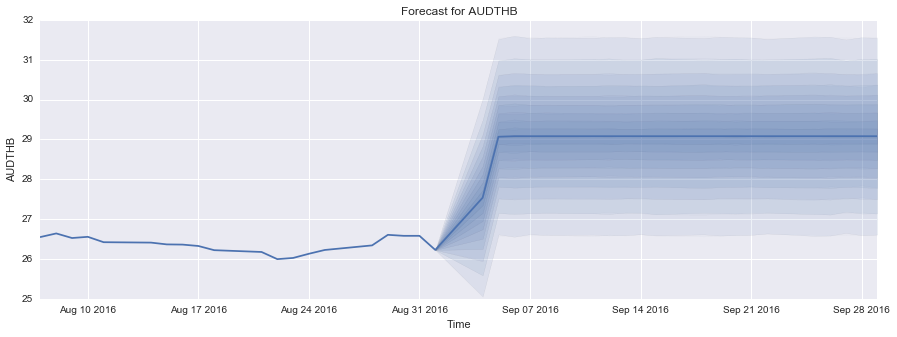

In [33]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [34]:
model.predict(h=10)

,AUDTHB
Date,
2016-09-08,27.537993
2016-09-09,29.066043
2016-09-10,29.079519
2016-09-11,29.079638
2016-09-12,29.079639
2016-09-15,29.079639
2016-09-16,29.079639
2016-09-17,29.079639
2016-09-18,29.079639
